## Elasticity:

### Compute Average Constant Elasticity (classic vlue used in bussiness management) 

### Compute elasticity at diferent independt variable value

In [11]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_stata('./auto_stata.dta')

df

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


### Features dispersion

In [15]:
def histogram_plot(df, feature1, feature2):

    # Create side-by-side plots
    plt.figure(figsize=(16, 6))

    # Histogram for feature1
    sns.histplot(data=df, x=feature1, bins=20, kde=True, color='skyblue', ax=plt.subplot(1, 2, 1))
    plt.axvline(df[feature1].quantile(0.01), color='red', linestyle='--', label='1st Percentile')
    plt.axvline(df[feature1].quantile(0.99), color='red', linestyle='--', label='99th Percentile')
    plt.title(f'{feature1.capitalize()}: Histogram with KDE')
    plt.xlabel(feature1)
    plt.ylabel('Frequency')
    plt.legend()

    # Histogram for feature2
    sns.histplot(data=df, x=feature2, bins=20, kde=True, color='lightcoral', ax=plt.subplot(1, 2, 2))
    plt.axvline(df[feature2].quantile(0.01), color='red', linestyle='--', label='1st Percentile')
    plt.axvline(df[feature2].quantile(0.99), color='red', linestyle='--', label='99th Percentile')
    plt.title(f'{feature2.capitalize()}: Histogram with KDE')
    plt.xlabel(feature2)
    plt.ylabel('Frequency')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


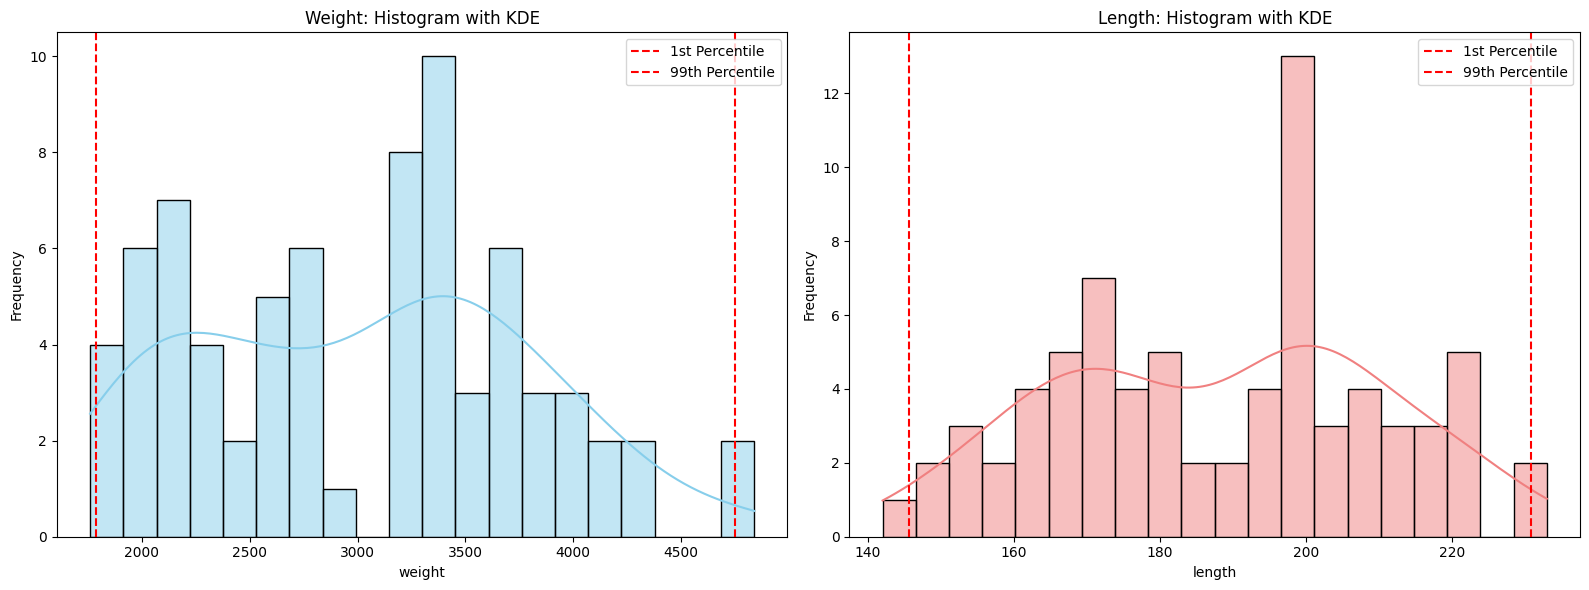

In [16]:
histogram_plot(df, 'weight', 'length')


### Estimating elasticities

In [98]:
# Define independent variables (X) and dependent variable (Y)
X = df[['weight', 'length']]  # Independent variables
X = sm.add_constant(X)  # Add constant term for intercept
Y = df['mpg']  # Dependent variable

# Fit the OLS model
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     69.34
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.02e-17
Time:                        16:18:21   Log-Likelihood:                -194.33
No. Observations:                  74   AIC:                             394.7
Df Residuals:                      71   BIC:                             401.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.8849      6.088      7.866      0.0

### Elasticity at means (constant elasticity)

### Step 1: Get average values of indepedet variables

In [99]:
### Weight
mean_wei = df['weight'].mean()

### lenght
mean_len = df['length'].mean()

print(mean_wei)
print(mean_len)

3019.4594594594596
187.93243243243242



### Step 2: Get prediction at means

In [100]:
b_weight = model.params['weight']
b_length = model.params['length']
const = model.params['const']

In [101]:
predicted_at_means = (
    mean_wei * b_weight +
    mean_len * b_length +
    const
)

predicted_at_means

21.297297297297295

### Step 3. Compute elasticity for both independet variables

In [102]:
eyex_weight_mean = (mean_wei * b_weight) / predicted_at_means
eyex_length_mean = (mean_len * b_length) / predicted_at_means

# Display results
print(f"weight: eyex at means = {eyex_weight_mean:.8f}")
print(f"length: eyex at means = {eyex_length_mean:.8f}")

weight: eyex at means = -0.54604966
length: eyex at means = -0.70235175


##### Interpretation:
* weight eyex = -0.55, a 1% increase in weight decreases the dependent variable (mpg) by 0.55%.
* lenght eyex = -0.70, a 1% increase in weight decreases the dependent variable (mpg) by 0.70%.

### Conditional marginal effects for different levels of weight while keeping length at its mean value

In [103]:
weight_levels = np.arange(1750, 5001, 250)

results = []

for weight in weight_levels:
    # Predicted value at each weight level (this is `f` in Stata)
    predicted_value = (
        weight * b_weight +
        mean_len * b_length +
        const
    )
    
    # Marginal effect (eyex)
    eyex_weight = (weight * b_weight) / predicted_value

    results.append({'weight': weight, 'eyex_weight': eyex_weight})

margins_df = pd.DataFrame(results)
margins_df

,weight,eyex_weight
0,1750,-0.257387
1,2000,-0.305385
2,2250,-0.357194
3,2500,-0.413284
4,2750,-0.474211
5,3000,-0.540628
6,3250,-0.613311
7,3500,-0.693193
8,3750,-0.781396
9,4000,-0.879294


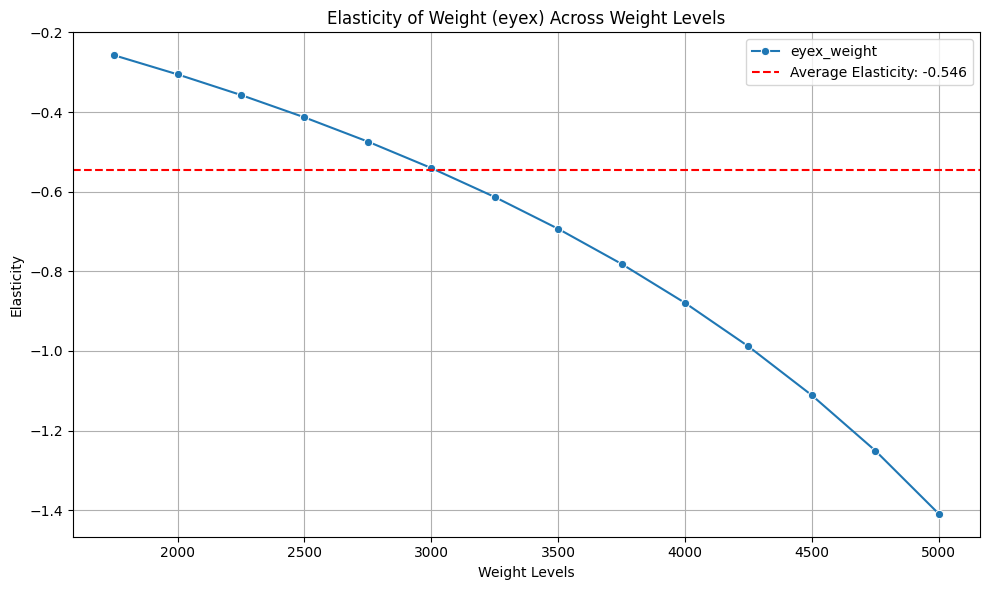

In [104]:
# Plotting the elasticity values
plt.figure(figsize=(10, 6))
sns.lineplot(x='weight', y='eyex_weight', data=margins_df, marker='o', label='eyex_weight')

# Add a horizontal line for the average elasticity
plt.axhline(eyex_weight_mean, color='red', linestyle='--', label=f'Average Elasticity: {eyex_weight_mean:.3f}')

# Add labels and title
plt.title('Elasticity of Weight (eyex) Across Weight Levels')
plt.xlabel('Weight Levels')
plt.ylabel('Elasticity')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [106]:
# Define weight and length levels
length_levels = np.arange(140, 241, 10)    # 140, 150, ..., 240

results = []

for length in length_levels:
    # Predicted value at each weight level (this is `f` in Stata)
    predicted_value = (
        mean_wei * b_weight +
        length * b_length +
        const
    )
    
    # Marginal effect (eyex)
    eyex_length = (length * b_length) / predicted_value

    results.append({'length': length, 'eyex_length': eyex_length})

margins_df_length = pd.DataFrame(results)
margins_df_length

,length,eyex_length
0,140,-0.443728
1,150,-0.490985
2,160,-0.541440
3,170,-0.595429
4,180,-0.653338
5,190,-0.715608
6,200,-0.782753
7,210,-0.855368
8,220,-0.934149
9,230,-1.019918


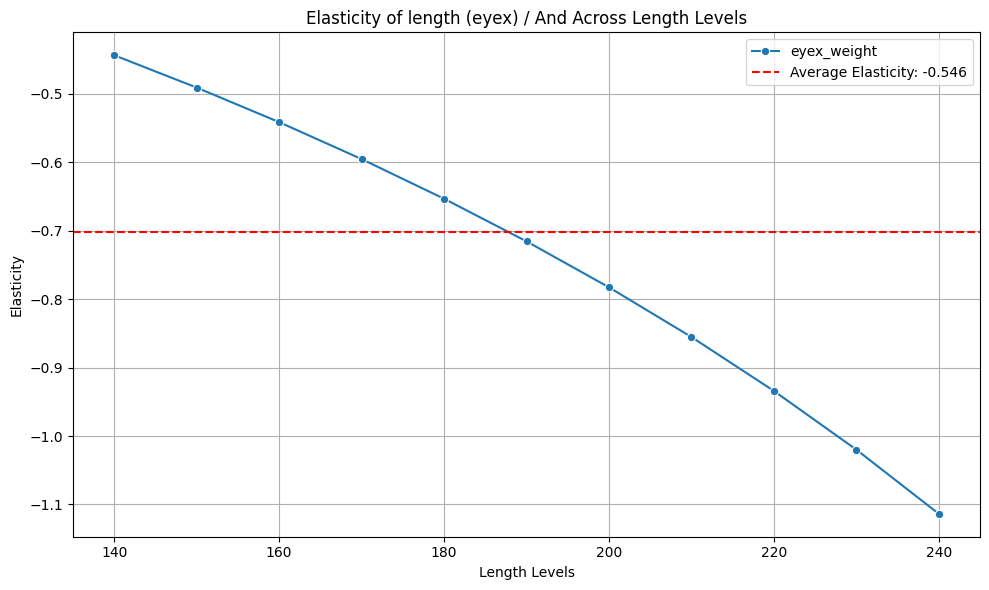

In [107]:
# Plotting the elasticity values
plt.figure(figsize=(10, 6))
sns.lineplot(x='length', y='eyex_length', data=margins_df_length, marker='o', label='eyex_weight')

# Add a horizontal line for the average elasticity
plt.axhline(eyex_length_mean, color='red', linestyle='--', label=f'Average Elasticity: {eyex_weight_mean:.3f}')

# Add labels and title
plt.title('Elasticity of length (eyex) / And Across Length Levels')
plt.xlabel('Length Levels')
plt.ylabel('Elasticity')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()